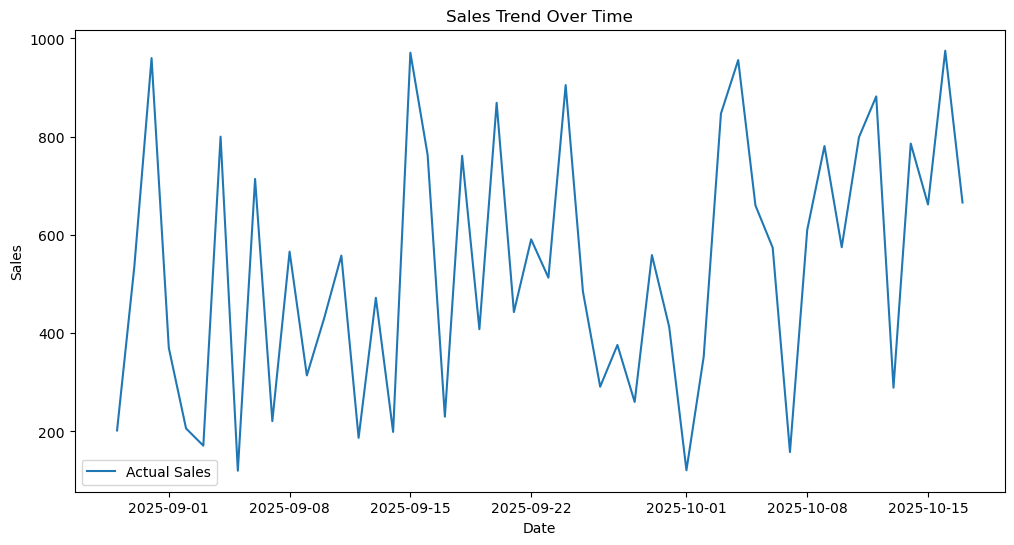

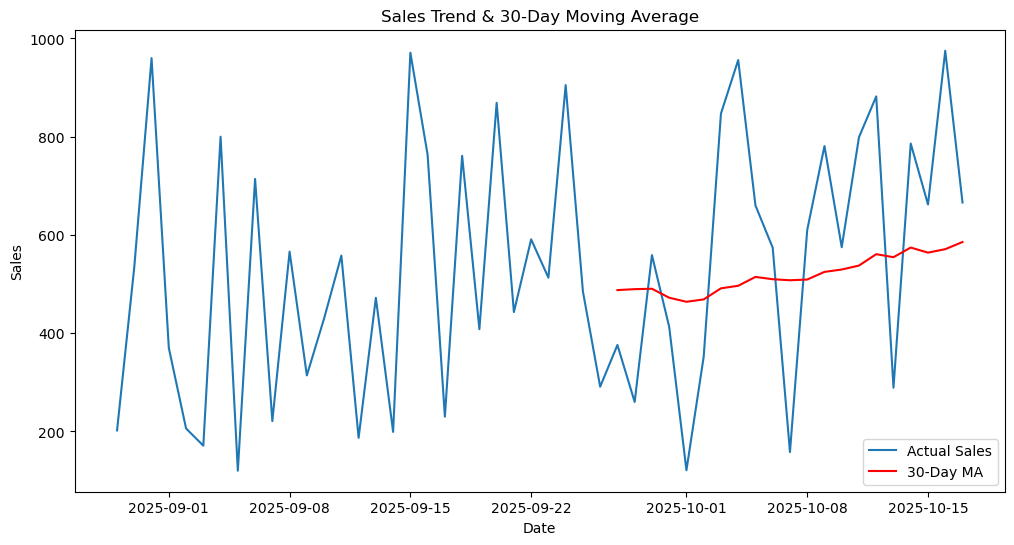

RMSE: 279.50
MAPE: 36.18%


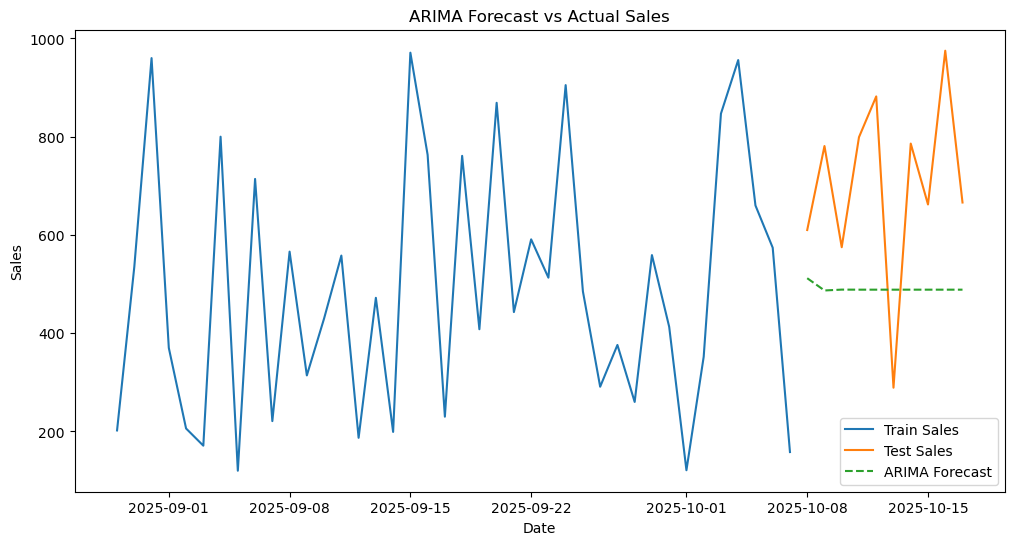

Future Sales Forecast (next 30 days):
                 Date  Forecasted_Sales
2025-10-08 2025-10-18        511.889686
2025-10-09 2025-10-19        486.926123
2025-10-10 2025-10-20        488.687065
2025-10-11 2025-10-21        488.562848
2025-10-12 2025-10-22        488.571610
2025-10-13 2025-10-23        488.570992
2025-10-14 2025-10-24        488.571036
2025-10-15 2025-10-25        488.571032
2025-10-16 2025-10-26        488.571033
2025-10-17 2025-10-27        488.571033
2025-10-18 2025-10-28        488.571033
2025-10-19 2025-10-29        488.571033
2025-10-20 2025-10-30        488.571033
2025-10-21 2025-10-31        488.571033
2025-10-22 2025-11-01        488.571033
2025-10-23 2025-11-02        488.571033
2025-10-24 2025-11-03        488.571033
2025-10-25 2025-11-04        488.571033
2025-10-26 2025-11-05        488.571033
2025-10-27 2025-11-06        488.571033
2025-10-28 2025-11-07        488.571033
2025-10-29 2025-11-08        488.571033
2025-10-30 2025-11-09        488.571033
20

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Read sales data
# Ensure your CSV has columns 'Date' and 'Sales'
df = pd.read_csv('Downloads/Sales_info.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D').fillna(0)  # daily frequency, fill missing with zero

# 1. Visualize Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Moving Average Trend (30 days)
df['Sales_MA30'] = df['Sales'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(df.index, df['Sales_MA30'], color='red', label='30-Day MA')
plt.title('Sales Trend & 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 2. ARIMA Forecasting

# Split into train/test sets (80/20 split)
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

# Fit ARIMA model (Order may need tuning)
model = ARIMA(train['Sales'], order=(1,1,1))
model_fit = model.fit()

# Forecast future periods
forecast = model_fit.forecast(steps=len(test))
test = test.copy()  # avoid SettingWithCopyWarning
test.loc[:, 'Forecast'] = forecast

# Validation metrics
rmse = np.sqrt(mean_squared_error(test['Sales'], test['Forecast']))
mape = mean_absolute_percentage_error(test['Sales'], test['Forecast'])

print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape * 100:.2f}%')

# 3. Plot ARIMA Forecast vs Actual
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Train Sales')
plt.plot(test.index, test['Sales'], label='Test Sales')
plt.plot(test.index, test['Forecast'], label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 4. Forecast Future Sales (next 30 days)
future_forecast = model_fit.forecast(steps=30)
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Sales': future_forecast})

print("Future Sales Forecast (next 30 days):")
print(forecast_df)